## Lab 3- Fourier Entertainment

In [2]:
import ugradio
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def combine_channels(data, num_channels, nsamples):
    smooth_data_median = np.zeros(nsamples/num_channels)
    smooth_data_average = np.zeros(nsamples/num_channels)

    for i in range(len(data)/num_channels):
        smooth_data_median[i] = np.median(data[num_channels*i:num_channels*(i+1)])
        smooth_data_average[i] = np.average(data[num_channels*i:num_channels*(i+1)])
    return smooth_data_median, smooth_data_average

def getPowerSpectra(input_voltage, t_samp):
    fourier = np.fft.fft(input_voltage)
    freqs = np.fft.fftfreq(len(fourier), t_samp)
    power = np.abs(fourier) ** 2

    return np.fft.fftshift(power), np.fft.fftshift(freqs)

def getFFT(input_voltage, v_samp):
    fourier = np.fft.fft(scaleToReal(input_voltage))
    freqs = np.fft.fftfreq(len(fourier), 1 / (v_samp)) 
    return fourier, freqs

def split_file_dual(filename, blocks = 50, divisor = 1, samples = 16000, volt_range = [-0.2, 0.2]):
    split_into_blocks = np.load(filename)[:2*samples]
    print(len(split_into_blocks))
    split_into_blocks.shape = (blocks*2, samples)

    split_complex = np.zeros((blocks, samples), dtype=np.complex)
    
    v_samp = 62.5e6/divisor
    
    for i in range(len(split_complex)):
        real = scaleToReal(split_into_blocks[i], volt_range)
        imag = scaleToReal(split_into_blocks[i + blocks], volt_range)

        split_complex[i] = real + np.multiply(1j, imag)
    return split_complex

In [28]:
def sub_3row(powers, freqs, titles, positive = True):
    fig, axes = plt.subplots(3)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    i = 0
    for freq, power, title in zip(freqs, powers, titles):
        if positive: 
            axes[i].plot(freq[(len(crab_freqs)/2 + 10):], power[(len(crab_freqs)/2 + 10):])
            axes[i].set_xlim(0,0.5)
        axes[i].set_xlabel("Frequency ($Hz$)", fontsize = 30)
        axes[i].set_ylabel("Power ($(V \cdot s)^2$", fontsize = 30)
        axes[i].tick_params(labelsize=20)
        axes[i].set_title(title, fontsize = 30)
        i += 1
    fig.tight_layout()
#     pl.savefig(plot_directory + "getting_shape_%d.pdf" %(num))

In [15]:
plot_directory = "/home/sabrinaberger/"
data_directory = "/home/data/Lab3_Week1_Data/"

crab_full = np.load(data_directory + "CrabData98.npz")
moon_full = np.load(data_directory + "MoonData2.npz")
sun_full = np.load(data_directory + "SunData2.npz")

# separating data into voltage (Volts) and time (unix time)
crab_voltage = crab_full['arr_1']
crab_time = crab_full['arr_0']

moon_voltage = moon_full['arr_1']
moon_time = moon_full['arr_0']

sun_voltage = sun_full['arr_1']
sun_time = sun_full['arr_0']

256
0.493339069161


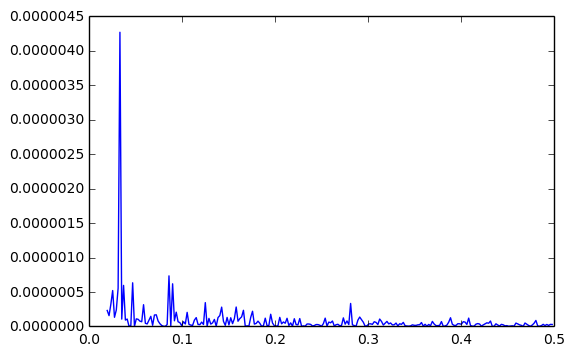

In [21]:
# plt.figure(figsize=(20,10))
# plt.plot(crab_time, crab_voltage)
# plt.tick_params(labelsize=20)

# fig, ax = pl.subplots(,3)

crab_power, crab_freqs = getPowerSpectra(crab_voltage[:512], ((crab_time[-1]-crab_time[0])/len(crab_time)))

print(np.argmax(crab_power))
print(crab_power[np.argmax(crab_power)])

plt.plot(crab_freqs[(len(crab_freqs)/2 + 10):], crab_power[(len(crab_freqs)/2 + 10):])


In [10]:
moon_power, moon_freqs = getPowerSpectra(moon_voltage[:512], 1/(moon_time[2]-moon_time[0]))

In [11]:
sun_power, sun_freqs = getPowerSpectra(sun_voltage[:512], 1/(sun_time[2]-sun_time[0]))

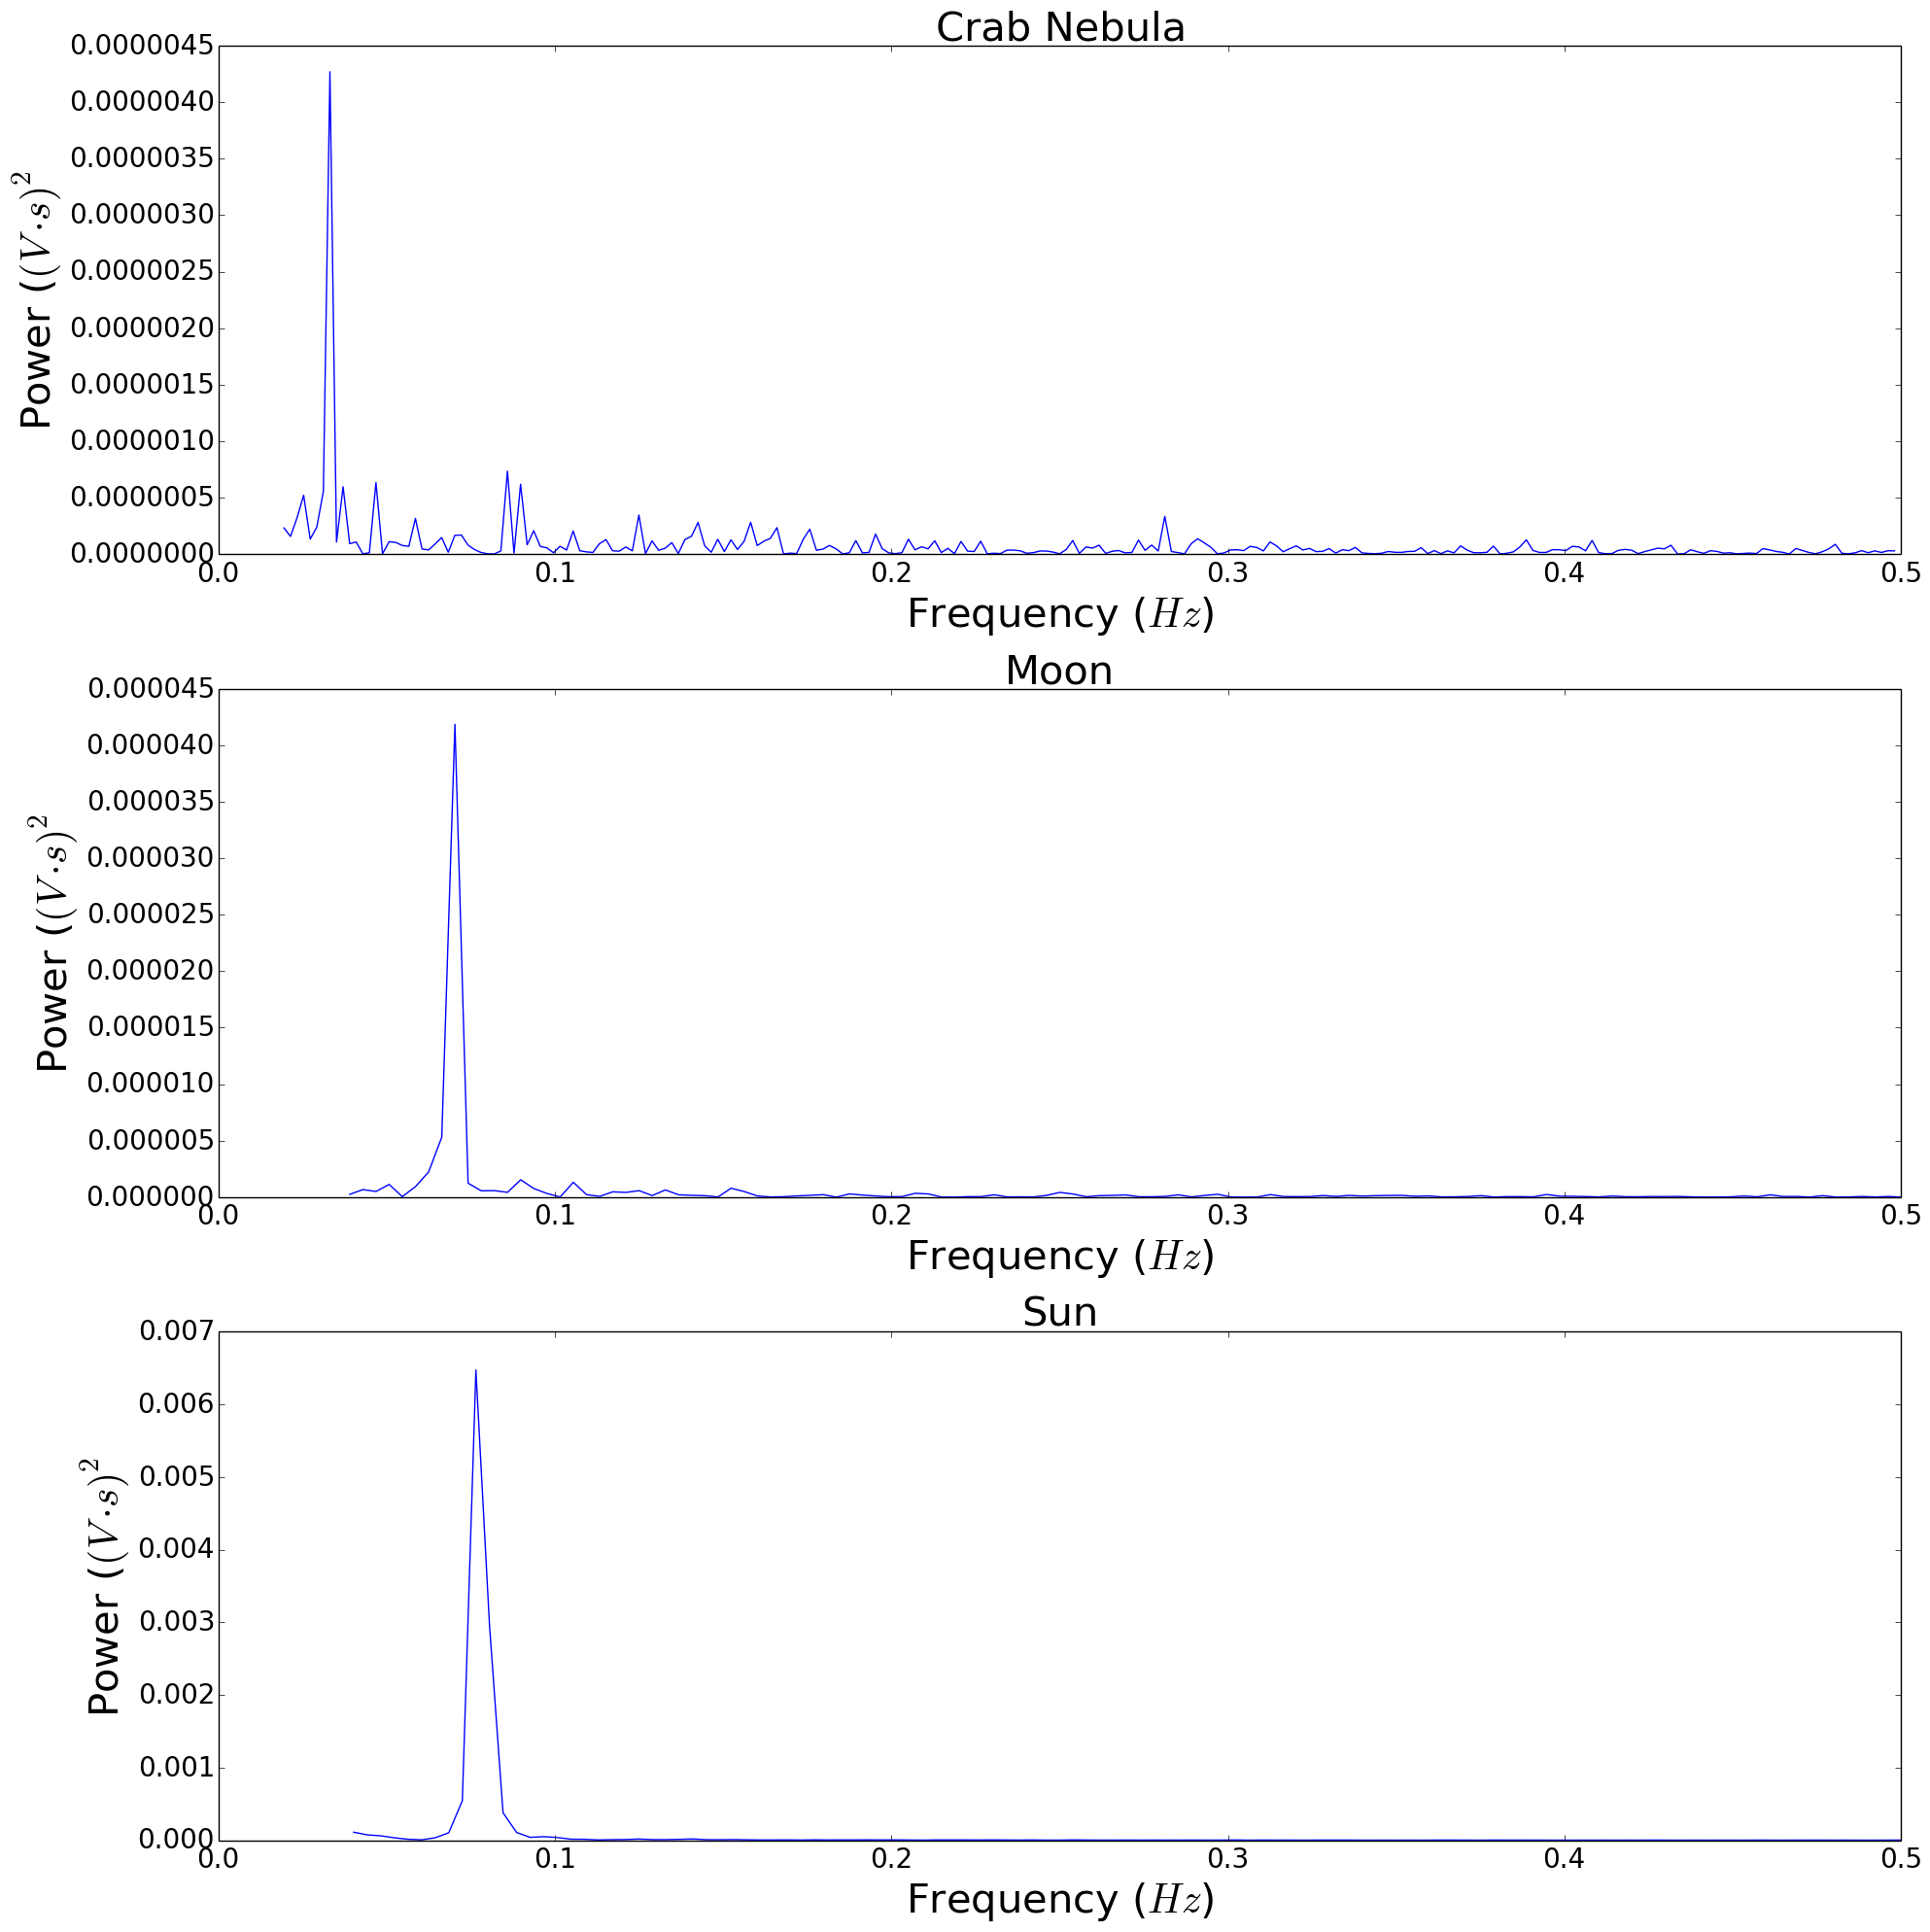

In [29]:
sub_3row([crab_power, moon_power, sun_power], [crab_freqs, moon_freqs, sun_freqs], ["Crab Nebula", "Moon", "Sun"])

In [ ]:
f_fringe = 20/(2.5e-2)